 할로윈 투자 전략은 **"Sell in May and Go Away"**라는 격언에 기반한 전략으로, 매년 5월부터 10월까지 시장에서 벗어나 있다가 11월부터 다시 투자하는 방식을 말합니다.
 이 전략은 역사적으로 11월부터 4월까지 시장이 더 강한 수익률을 보인다는 가설에서 유래했습니다.

문제1. 3개 개별 종목 주식 데이터(2000년~2023)에서 할로윈 투자 전략에 따라 11월부터 4월까지의 투자 성과를 계산하세요.(비교 대상 단순 보유 수익률)
데이터에서 **MDD (Maximum Drawdown)**를 구해 이 전략의 최대 손실을 계산해보세요.


In [215]:
import pandas as pd
import FinanceDataReader as fdr
nvidia = fdr.DataReader('NVDA', '2000', '20231231')
threeM = fdr.DataReader('MMM', '2000', '20231231')
apple = fdr.DataReader('AAPL', '2000', '20231231')


In [216]:
# visa.info(), visa.index
# threeM.info(), threeM.index
# apple.info(), apple.index

nvidia.index


DatetimeIndex(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06',
               '2000-01-07', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14',
               ...
               '2023-12-15', '2023-12-18', '2023-12-19', '2023-12-20',
               '2023-12-21', '2023-12-22', '2023-12-26', '2023-12-27',
               '2023-12-28', '2023-12-29'],
              dtype='datetime64[ns]', length=6037, freq=None)

In [217]:
# 2000년부터 2003년까지의 할로윈 전략 수익률 계산
for year in range(2000, 2023):

    # 매수 시점 (해당 연도 11월 첫 거래일의 Adj Close) Buy Price
    # 매도 시점 (다음 연도 4월 마지막 거래일의 Adj Close) Sell Price
    nvidiaBP = nvidia.loc[str(year)+'-11'].iloc[0]['Adj Close']
    nvidiaSP = nvidia.loc[str(year+1)+'-04'].iloc[-1]['Adj Close']
    threeMBP = threeM.loc[str(year)+'-11'].iloc[0]['Adj Close']
    threeMSP = threeM.loc[str(year+1)+'-04'].iloc[-1]['Adj Close']
    appleBP = apple.loc[str(year)+'-11'].iloc[0]['Adj Close']
    appleSP = apple.loc[str(year+1)+'-04'].iloc[-1]['Adj Close']
    # # 수익률 계산 및 출력
    returns = ((nvidiaSP / nvidiaBP) -1)  * 100
    returns2 = (threeMSP / threeMBP) * 100
    returns3 = (appleSP / appleBP) * 100
    print(f'{year}년 엔비디아 할로윈 전략 수익률: {returns:.2f}%')
    print(f'{year}년 쓰리엠 할로윈 전략 수익률: {returns2:.2f}%')
    print(f'{year}년 애플 할로윈 전략 수익률: {returns3:.2f}%')


2000년 엔비디아 할로윈 전략 수익률: 34.08%
2000년 쓰리엠 할로윈 전략 수익률: 126.55%
2000년 애플 할로윈 전략 수익률: 124.34%
2001년 엔비디아 할로윈 전략 수익률: -25.17%
2001년 쓰리엠 할로윈 전략 수익률: 119.64%
2001년 애플 할로윈 전략 수익률: 130.55%
2002년 엔비디아 할로윈 전략 수익률: 1.63%
2002년 쓰리엠 할로윈 전략 수익률: 99.43%
2002년 애플 할로윈 전략 수익률: 86.92%
2003년 엔비디아 할로윈 전략 수익률: 13.94%
2003년 쓰리엠 할로윈 전략 수익률: 110.73%
2003년 애플 할로윈 전략 수익률: 111.36%
2004년 엔비디아 할로윈 전략 수익률: 48.38%
2004년 쓰리엠 할로윈 전략 수익률: 100.37%
2004년 애플 할로윈 전략 수익률: 137.50%
2005년 엔비디아 할로윈 전략 수익률: 76.34%
2005년 쓰리엠 할로윈 전략 수익률: 115.45%
2005년 애플 할로윈 전략 수익률: 122.42%
2006년 엔비디아 할로윈 전략 수익률: 2.21%
2006년 쓰리엠 할로윈 전략 수익률: 106.25%
2006년 애플 할로윈 전략 수익률: 126.07%
2007년 엔비디아 할로윈 전략 수익률: -41.92%
2007년 쓰리엠 할로윈 전략 수익률: 92.78%
2007년 애플 할로윈 전략 수익률: 92.80%
2008년 엔비디아 할로윈 전략 수익률: 36.02%
2008년 쓰리엠 할로윈 전략 수익률: 91.56%
2008년 애플 할로윈 전략 수익률: 117.64%
2009년 엔비디아 할로윈 전략 수익률: 30.16%
2009년 쓰리엠 할로윈 전략 수익률: 120.94%
2009년 애플 할로윈 전략 수익률: 137.92%
2010년 엔비디아 할로윈 전략 수익률: 66.11%
2010년 쓰리엠 할로윈 전략 수익률: 117.18%
2010년 애플 할로윈 전략 수익률: 115.11%
2011년 엔비디아 할로윈 전략 수익률: -7.

In [218]:
for year in range(2000, 2023):
    try:
        # 각 기업별 기간 마스크 생성
        nvidia_mask = (nvidia.index >= f'{year}-11-01') & (nvidia.index <= f'{year+1}-04-30')
        threeM_mask = (threeM.index >= f'{year}-11-01') & (threeM.index <= f'{year+1}-04-30')
        apple_mask = (apple.index >= f'{year}-11-01') & (apple.index <= f'{year+1}-04-30')

        # 각 기업별 기간 데이터 추출
        nvidia_period = nvidia.loc[nvidia_mask]['Adj Close']
        threeM_period = threeM.loc[threeM_mask]['Adj Close']
        apple_period = apple.loc[apple_mask]['Adj Close']

        # MDD 계산
        # NVIDIA MDD
        nvidia_cummax = nvidia_period.cummax()
        nvidia_drawdown = (nvidia_period - nvidia_cummax) / nvidia_cummax * 100
        nvidia_mdd = nvidia_drawdown.min()

        # ThreeM MDD
        threeM_cummax = threeM_period.cummax()
        threeM_drawdown = (threeM_period - threeM_cummax) / threeM_cummax * 100
        threeM_mdd = threeM_drawdown.min()

        # Apple MDD
        apple_cummax = apple_period.cummax()
        apple_drawdown = (apple_period - apple_cummax) / apple_cummax * 100
        apple_mdd = apple_drawdown.min()

        # 결과 출력
        print(f'\n{year}년 11월 ~ {year+1}년 4월 성과:')
        print(f'NVIDIA - MDD: {nvidia_mdd:.2f}%')
        print(f'ThreeM - MDD: {threeM_mdd:.2f}%')
        print(f'Apple - MDD: {apple_mdd:.2f}%')
        print('-' * 50)

    except KeyError as e:
        print(f"{year}년 데이터 일부 누락: {e}")
        continue


2000년 11월 ~ 2001년 4월 성과:
NVIDIA - MDD: -63.68%
ThreeM - MDD: -18.69%
Apple - MDD: -37.25%
--------------------------------------------------

2001년 11월 ~ 2002년 4월 성과:
NVIDIA - MDD: -57.65%
ThreeM - MDD: -14.03%
Apple - MDD: -15.52%
--------------------------------------------------

2002년 11월 ~ 2003년 4월 성과:
NVIDIA - MDD: -43.37%
ThreeM - MDD: -8.54%
Apple - MDD: -23.81%
--------------------------------------------------

2003년 11월 ~ 2004년 4월 성과:
NVIDIA - MDD: -24.67%
ThreeM - MDD: -12.02%
Apple - MDD: -14.90%
--------------------------------------------------

2004년 11월 ~ 2005년 4월 성과:
NVIDIA - MDD: -26.87%
ThreeM - MDD: -13.24%
Apple - MDD: -21.56%
--------------------------------------------------

2005년 11월 ~ 2006년 4월 성과:
NVIDIA - MDD: -8.30%
ThreeM - MDD: -11.02%
Apple - MDD: -31.41%
--------------------------------------------------

2006년 11월 ~ 2007년 4월 성과:
NVIDIA - MDD: -26.74%
ThreeM - MDD: -10.01%
Apple - MDD: -14.24%
--------------------------------------------------

2007년 1

문제2-1. 할로윈 전략에 따른 누적 수익률 계산
조건: 매년 11월부터 다음 해 4월까지의 수익률 계산.
목표: 전체 투자 기간 동안의 누적 수익률 구하기.

In [219]:
# 수익률을 저장할 리스트
returnsList = []

for year in range(2000, 2023):
    # 매수 시점 (해당 연도 11월 첫 거래일의 종가)
    nvidiaBP = nvidia.loc[str(year) + '-11'].iloc[0]['Adj Close']
    
    # 매도 시점 (다음 연도 4월 마지막 거래일의 종가)
    nvidiaSP = nvidia.loc[str(year+1) + '-04'].iloc[-1]['Adj Close']
    
    # 단일 기간 수익률
    periodReturn = nvidiaSP / nvidiaBP
    returnsList.append(periodReturn)
    
    # 단일 기간 수익률 출력
    simpleReturn = ((periodReturn) - 1) * 100
    
    # 현재까지의 누적 수익률 계산
    cumuReturn = (pd.Series(returnsList).cumprod().iloc[-1] - 1) * 100
    
    print(f'{year}년 11월 ~ {year+1}년 4월:')
    print(f'단일 기간 수익률: {simpleReturn:.2f}%')
    print(f'누적 수익률: {cumuReturn:.2f}%\n')

# 전체 기간 최종 누적 수익률
nvidiafinalCumu = (pd.Series(returnsList).cumprod().iloc[-1] - 1) * 100

2000년 11월 ~ 2001년 4월:
단일 기간 수익률: 34.08%
누적 수익률: 34.08%

2001년 11월 ~ 2002년 4월:
단일 기간 수익률: -25.17%
누적 수익률: 0.33%

2002년 11월 ~ 2003년 4월:
단일 기간 수익률: 1.63%
누적 수익률: 1.97%

2003년 11월 ~ 2004년 4월:
단일 기간 수익률: 13.94%
누적 수익률: 16.18%

2004년 11월 ~ 2005년 4월:
단일 기간 수익률: 48.38%
누적 수익률: 72.38%

2005년 11월 ~ 2006년 4월:
단일 기간 수익률: 76.34%
누적 수익률: 203.99%

2006년 11월 ~ 2007년 4월:
단일 기간 수익률: 2.21%
누적 수익률: 210.69%

2007년 11월 ~ 2008년 4월:
단일 기간 수익률: -41.92%
누적 수익률: 80.46%

2008년 11월 ~ 2009년 4월:
단일 기간 수익률: 36.02%
누적 수익률: 145.46%

2009년 11월 ~ 2010년 4월:
단일 기간 수익률: 30.16%
누적 수익률: 219.49%

2010년 11월 ~ 2011년 4월:
단일 기간 수익률: 66.11%
누적 수익률: 430.71%

2011년 11월 ~ 2012년 4월:
단일 기간 수익률: -7.54%
누적 수익률: 390.70%

2012년 11월 ~ 2013년 4월:
단일 기간 수익률: 11.11%
누적 수익률: 445.20%

2013년 11월 ~ 2014년 4월:
단일 기간 수익률: 22.24%
누적 수익률: 566.46%

2014년 11월 ~ 2015년 4월:
단일 기간 수익률: 12.63%
누적 수익률: 650.64%

2015년 11월 ~ 2016년 4월:
단일 기간 수익률: 24.72%
누적 수익률: 836.20%

2016년 11월 ~ 2017년 4월:
단일 기간 수익률: 51.47%
누적 수익률: 1318.03%

2017년 11월 ~ 2018년 4월:
단일 기간 수익률: 8.69%

In [220]:
# 수익률을 저장할 리스트
returnsList = []

for year in range(2000, 2023):
    # 매수 시점 (해당 연도 11월 첫 거래일의 종가)
    threeMBP = threeM.loc[str(year) + '-11'].iloc[0]['Adj Close']
    
    # 매도 시점 (다음 연도 4월 마지막 거래일의 종가)
    threeMSP = threeM.loc[str(year+1) + '-04'].iloc[-1]['Adj Close']
    
    # 단일 기간 수익률
    periodReturn = threeMSP / threeMBP
    returnsList.append(periodReturn)
    
    # 단일 기간 수익률 출력
    simpleReturn = ((periodReturn) - 1) * 100
    
    # 현재까지의 누적 수익률 계산
    cumuReturn = (pd.Series(returnsList).cumprod().iloc[-1] - 1) * 100
    
    print(f'{year}년 11월 ~ {year+1}년 4월:')
    print(f'단일 기간 수익률: {simpleReturn:.2f}%')
    print(f'누적 수익률: {cumuReturn:.2f}%\n')

# 전체 기간 최종 누적 수익률
threeMfinalCumu = (pd.Series(returnsList).cumprod().iloc[-1] - 1) * 100


2000년 11월 ~ 2001년 4월:
단일 기간 수익률: 26.55%
누적 수익률: 26.55%

2001년 11월 ~ 2002년 4월:
단일 기간 수익률: 19.64%
누적 수익률: 51.40%

2002년 11월 ~ 2003년 4월:
단일 기간 수익률: -0.57%
누적 수익률: 50.54%

2003년 11월 ~ 2004년 4월:
단일 기간 수익률: 10.73%
누적 수익률: 66.68%

2004년 11월 ~ 2005년 4월:
단일 기간 수익률: 0.37%
누적 수익률: 67.30%

2005년 11월 ~ 2006년 4월:
단일 기간 수익률: 15.45%
누적 수익률: 93.15%

2006년 11월 ~ 2007년 4월:
단일 기간 수익률: 6.25%
누적 수익률: 105.22%

2007년 11월 ~ 2008년 4월:
단일 기간 수익률: -7.22%
누적 수익률: 90.40%

2008년 11월 ~ 2009년 4월:
단일 기간 수익률: -8.44%
누적 수익률: 74.33%

2009년 11월 ~ 2010년 4월:
단일 기간 수익률: 20.94%
누적 수익률: 110.83%

2010년 11월 ~ 2011년 4월:
단일 기간 수익률: 17.18%
누적 수익률: 147.05%

2011년 11월 ~ 2012년 4월:
단일 기간 수익률: 18.38%
누적 수익률: 192.47%

2012년 11월 ~ 2013년 4월:
단일 기간 수익률: 18.83%
누적 수익률: 247.54%

2013년 11월 ~ 2014년 4월:
단일 기간 수익률: 11.75%
누적 수익률: 288.37%

2014년 11월 ~ 2015년 4월:
단일 기간 수익률: 3.20%
누적 수익률: 300.80%

2015년 11월 ~ 2016년 4월:
단일 기간 수익률: 6.11%
누적 수익률: 325.31%

2016년 11월 ~ 2017년 4월:
단일 기간 수익률: 20.77%
누적 수익률: 413.66%

2017년 11월 ~ 2018년 4월:
단일 기간 수익률: -14.62%
누적

In [221]:
# 수익률을 저장할 리스트
returnsList = []

for year in range(2000, 2023):
    # 매수 시점 (해당 연도 11월 첫 거래일의 종가)
    appleBP = apple.loc[str(year) + '-11'].iloc[0]['Adj Close']
    
    # 매도 시점 (다음 연도 4월 마지막 거래일의 종가)
    appleSP = apple.loc[str(year+1) + '-04'].iloc[-1]['Adj Close']
    
    # 단일 기간 수익률
    periodReturn = appleSP / appleBP
    returnsList.append(periodReturn)
    
    # 단일 기간 수익률 출력
    simpleReturn = ((periodReturn) - 1) * 100
    
    # 현재까지의 누적 수익률 계산
    cumuReturn = (pd.Series(returnsList).cumprod().iloc[-1] - 1) * 100
    
    print(f'{year}년 11월 ~ {year+1}년 4월:')
    print(f'단일 기간 수익률: {simpleReturn:.2f}%')
    print(f'누적 수익률: {cumuReturn:.2f}%\n')

# 전체 기간 최종 누적 수익률
applefinalCumu = (pd.Series(returnsList).cumprod().iloc[-1] - 1) * 100


2000년 11월 ~ 2001년 4월:
단일 기간 수익률: 24.34%
누적 수익률: 24.34%

2001년 11월 ~ 2002년 4월:
단일 기간 수익률: 30.55%
누적 수익률: 62.33%

2002년 11월 ~ 2003년 4월:
단일 기간 수익률: -13.08%
누적 수익률: 41.10%

2003년 11월 ~ 2004년 4월:
단일 기간 수익률: 11.36%
누적 수익률: 57.13%

2004년 11월 ~ 2005년 4월:
단일 기간 수익률: 37.50%
누적 수익률: 116.06%

2005년 11월 ~ 2006년 4월:
단일 기간 수익률: 22.42%
누적 수익률: 164.49%

2006년 11월 ~ 2007년 4월:
단일 기간 수익률: 26.07%
누적 수익률: 233.45%

2007년 11월 ~ 2008년 4월:
단일 기간 수익률: -7.20%
누적 수익률: 209.45%

2008년 11월 ~ 2009년 4월:
단일 기간 수익률: 17.64%
누적 수익률: 264.05%

2009년 11월 ~ 2010년 4월:
단일 기간 수익률: 37.92%
누적 수익률: 402.08%

2010년 11월 ~ 2011년 4월:
단일 기간 수익률: 15.11%
누적 수익률: 477.93%

2011년 11월 ~ 2012년 4월:
단일 기간 수익률: 47.28%
누적 수익률: 751.17%

2012년 11월 ~ 2013년 4월:
단일 기간 수익률: -25.00%
누적 수익률: 538.37%

2013년 11월 ~ 2014년 4월:
단일 기간 수익률: 14.82%
누적 수익률: 632.96%

2014년 11월 ~ 2015년 4월:
단일 기간 수익률: 15.35%
누적 수익률: 745.44%

2015년 11월 ~ 2016년 4월:
단일 기간 수익률: -21.89%
누적 수익률: 560.36%

2016년 11월 ~ 2017년 4월:
단일 기간 수익률: 30.07%
누적 수익률: 758.92%

2017년 11월 ~ 2018년 4월:
단일 기간 수익률:

In [222]:
nvidiafinalCumu, threeMfinalCumu, applefinalCumu

(3154.505561172872, 248.28502963562337, 1209.4025633264805)

문제2-2. MDD (Maximum Drawdown) 계산
조건: 데이터 전체 기간에서 MDD를 계산하세요.
목표: 투자 기간 중 최대 손실률을 계산.

In [223]:
nvidia['전고점'] = nvidia['Close'].cummax()
threeM['전고점'] = threeM['Close'].cummax()
apple['전고점'] = apple['Close'].cummax()

nvidia['DD'] = (1 - (nvidia['Close'] / nvidia['전고점'])) * 100
threeM['DD'] = (1 - (threeM['Close'] / threeM['전고점'])) * 100
apple['DD'] = (1 - (apple['Close'] / apple['전고점'])) * 100
nvidia.describe()

nvidia['MDD'] = nvidia['DD']*-1
threeM['MDD'] = threeM['DD']*-1
apple['MDD'] = apple['DD']*-1

nvidia['MDD'], threeM['MDD'], apple['MDD']

(2000-01-03    -0.000000
 2000-01-04    -2.670058
 2000-01-05    -5.874328
 2000-01-06   -12.016279
 2000-01-07   -10.546927
                 ...    
 2023-12-22    -3.132374
 2023-12-26    -2.241665
 2023-12-27    -1.967904
 2023-12-28    -1.759608
 2023-12-29    -1.759608
 Name: MDD, Length: 6037, dtype: float64,
 2000-01-03    -0.000000
 2000-01-04    -3.973501
 2000-01-05    -1.192044
 2000-01-06    -0.000000
 2000-01-07    -0.000000
                 ...    
 2023-12-22   -58.887215
 2023-12-26   -58.198972
 2023-12-27   -57.955381
 2023-12-28   -57.588058
 2023-12-29   -57.731123
 Name: MDD, Length: 6037, dtype: float64,
 2000-01-03    -0.000000
 2000-01-04    -8.431001
 2000-01-05    -7.091056
 2000-01-06   -15.131245
 2000-01-07   -11.111100
                 ...    
 2023-12-22    -2.276510
 2023-12-26    -2.554135
 2023-12-27    -2.503663
 2023-12-28    -2.286608
 2023-12-29    -2.816618
 Name: MDD, Length: 6037, dtype: float64)

### 추가과제, 미완, 나중에 한번더 보기
변형 전략:
할로윈 투자 전략을 6개월 주기로 변경해 성과를 비교하세요.
매년 11월4월과 5월10월의 성과 차이를 시각화하세요.


In [224]:
def calculate_seasonal_strategy(stock_data, stock_name, season='halloween', start_year=2000, end_year=2023):
    """
    계절성 전략의 수익률을 계산하는 함수
    season: 'halloween' (11월-4월) 또는 'summer' (5월-10월)
    """
    returnsList = []
    
    for year in range(start_year, end_year):
        try:
            if season == 'halloween':
                # 할로윈 기간 (11월-4월)
                buyPrice = stock_data.loc[str(year) + '-11'].iloc[0]['Adj Close']
                sellPrice = stock_data.loc[str(year+1) + '-04'].iloc[-1]['Adj Close']
                period_text = f'{year}년 11월 ~ {year+1}년 4월'
            else:
                # 여름 기간 (5월-10월)
                buyPrice = stock_data.loc[str(year) + '-05'].iloc[0]['Adj Close']
                sellPrice = stock_data.loc[str(year) + '-10'].iloc[-1]['Adj Close']
                period_text = f'{year}년 5월 ~ {year}년 10월'
            
            periodReturn = (sellPrice / buyPrice)
            returnsList.append(periodReturn)
            
            simpleReturn = ((periodReturn) - 1) * 100
            cumuReturn = (pd.Series(returnsList).cumprod().iloc[-1] - 1) * 100
            
            print(f'{stock_name} {period_text}:')
            print(f'단일 기간 수익률: {simpleReturn:.2f}%')
            print(f'누적 수익률: {cumuReturn:.2f}%\n')
            
        except KeyError as e:
            print(f"{stock_name} {year}년 데이터 누락: {e}")
            continue
    
    finalCumu = (pd.Series(returnsList).cumprod().iloc[-1] - 1) * 100
    return finalCumu, returnsList

# 할로윈 기간(11월-4월) 수익률 계산
apple_halloween, _ = calculate_seasonal_strategy(apple, 'Apple', 'halloween')
nvidia_halloween, _ = calculate_seasonal_strategy(nvidia, 'NVIDIA', 'halloween')
threeM_halloween, _ = calculate_seasonal_strategy(threeM, 'ThreeM', 'halloween')

# 여름 기간(5월-10월) 수익률 계산
apple_summer, _ = calculate_seasonal_strategy(apple, 'Apple', 'summer')
nvidia_summer, _ = calculate_seasonal_strategy(nvidia, 'NVIDIA', 'summer')
threeM_summer, _ = calculate_seasonal_strategy(threeM, 'ThreeM', 'summer')


Apple 2000년 11월 ~ 2001년 4월:
단일 기간 수익률: 24.34%
누적 수익률: 24.34%

Apple 2001년 11월 ~ 2002년 4월:
단일 기간 수익률: 30.55%
누적 수익률: 62.33%

Apple 2002년 11월 ~ 2003년 4월:
단일 기간 수익률: -13.08%
누적 수익률: 41.10%

Apple 2003년 11월 ~ 2004년 4월:
단일 기간 수익률: 11.36%
누적 수익률: 57.13%

Apple 2004년 11월 ~ 2005년 4월:
단일 기간 수익률: 37.50%
누적 수익률: 116.06%

Apple 2005년 11월 ~ 2006년 4월:
단일 기간 수익률: 22.42%
누적 수익률: 164.49%

Apple 2006년 11월 ~ 2007년 4월:
단일 기간 수익률: 26.07%
누적 수익률: 233.45%

Apple 2007년 11월 ~ 2008년 4월:
단일 기간 수익률: -7.20%
누적 수익률: 209.45%

Apple 2008년 11월 ~ 2009년 4월:
단일 기간 수익률: 17.64%
누적 수익률: 264.05%

Apple 2009년 11월 ~ 2010년 4월:
단일 기간 수익률: 37.92%
누적 수익률: 402.08%

Apple 2010년 11월 ~ 2011년 4월:
단일 기간 수익률: 15.11%
누적 수익률: 477.93%

Apple 2011년 11월 ~ 2012년 4월:
단일 기간 수익률: 47.28%
누적 수익률: 751.17%

Apple 2012년 11월 ~ 2013년 4월:
단일 기간 수익률: -25.00%
누적 수익률: 538.37%

Apple 2013년 11월 ~ 2014년 4월:
단일 기간 수익률: 14.82%
누적 수익률: 632.96%

Apple 2014년 11월 ~ 2015년 4월:
단일 기간 수익률: 15.35%
누적 수익률: 745.44%

Apple 2015년 11월 ~ 2016년 4월:
단일 기간 수익률: -21.89%
누적 수익률: 56

/tmp/ipykernel_35440/4081399384.py:62: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  plt.tight_layout()
/usr/local/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


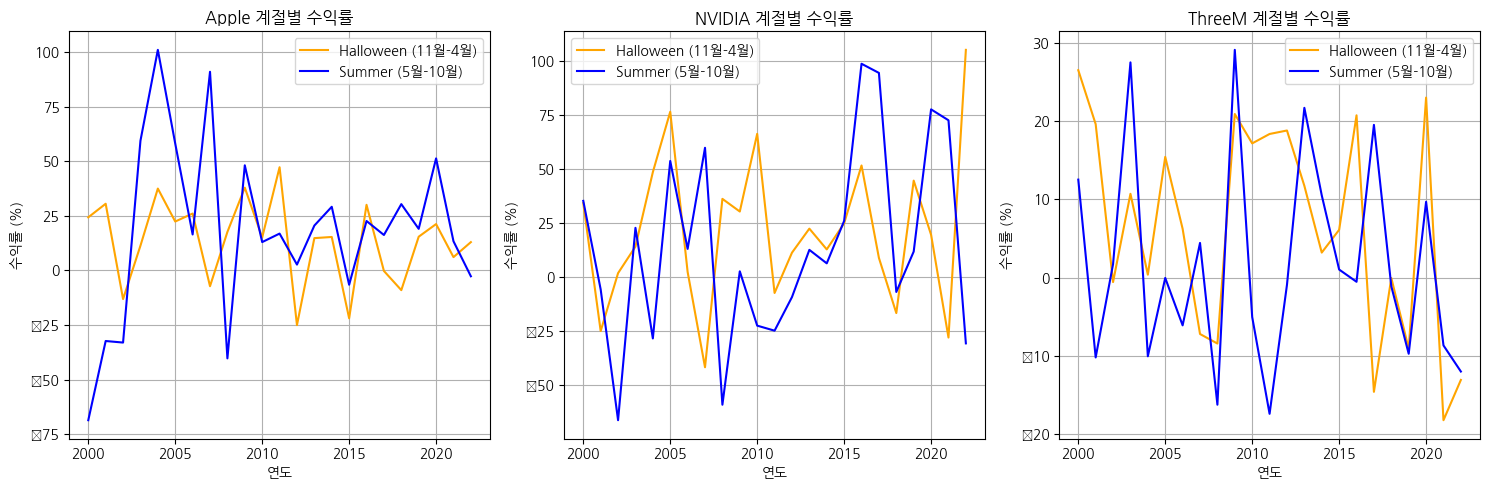

NameError: name 'np' is not defined

<Figure size 1500x600 with 0 Axes>

In [225]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl 
# 한글 폰트 설정 (NanumGothic) 
mpl.rcParams['font.family'] = 'NanumGothic'

def calculate_seasonal_strategy(stock_data, stock_name, season='halloween', start_year=2000, end_year=2023):
    returnsList = []
    yearly_returns = []  # 연도별 수익률을 저장할 리스트
    
    for year in range(start_year, end_year):
        try:
            if season == 'halloween':
                buyPrice = stock_data.loc[str(year) + '-11'].iloc[0]['Adj Close']
                sellPrice = stock_data.loc[str(year+1) + '-04'].iloc[-1]['Adj Close']
                period_text = f'{year}년 11월 ~ {year+1}년 4월'
            else:
                buyPrice = stock_data.loc[str(year) + '-05'].iloc[0]['Adj Close']
                sellPrice = stock_data.loc[str(year) + '-10'].iloc[-1]['Adj Close']
                period_text = f'{year}년 5월 ~ {year}년 10월'
            
            periodReturn = (sellPrice / buyPrice)
            returnsList.append(periodReturn)
            
            simpleReturn = ((periodReturn) - 1) * 100
            yearly_returns.append(simpleReturn)  # 연도별 수익률 저장
            cumuReturn = (pd.Series(returnsList).cumprod().iloc[-1] - 1) * 100
            
        except KeyError as e:
            print(f"{stock_name} {year}년 데이터 누락: {e}")
            continue
    
    finalCumu = (pd.Series(returnsList).cumprod().iloc[-1] - 1) * 100
    return finalCumu, yearly_returns

# 각 주식의 계절별 수익률 계산
stocks = {'Apple': apple, 'NVIDIA': nvidia, 'ThreeM': threeM}
results = {}

for stock_name, stock_data in stocks.items():
    _, halloween_returns = calculate_seasonal_strategy(stock_data, stock_name, 'halloween')
    _, summer_returns = calculate_seasonal_strategy(stock_data, stock_name, 'summer')
    results[stock_name] = {
        'Halloween': halloween_returns,
        'Summer': summer_returns
    }

# 1. 분리된 그래프로 시각화
plt.figure(figsize=(15, 5))
for i, (stock_name, data) in enumerate(results.items(), 1):
    plt.subplot(1, 3, i)
    years = range(2000, 2000 + len(data['Halloween']))
    
    plt.plot(years, data['Halloween'], label='Halloween (11월-4월)', color='orange')
    plt.plot(years, data['Summer'], label='Summer (5월-10월)', color='blue')
    
    plt.title(f'{stock_name} 계절별 수익률')
    plt.xlabel('연도')
    plt.ylabel('수익률 (%)')
    plt.legend()
    plt.grid(True)
plt.tight_layout()
plt.show()

# 2. 겹친 막대 그래프로 시각화
plt.figure(figsize=(15, 6))
x = np.arange(len(stocks))
width = 0.35

halloween_means = [np.mean(results[stock]['Halloween']) for stock in stocks]
summer_means = [np.mean(results[stock]['Summer']) for stock in stocks]

plt.bar(x - width/2, halloween_means, width, label='Halloween (11월-4월)', color='orange', alpha=0.7)
plt.bar(x + width/2, summer_means, width, label='Summer (5월-10월)', color='blue', alpha=0.7)

plt.xlabel('주식')
plt.ylabel('평균 수익률 (%)')
plt.title('주식별 계절 전략 평균 수익률 비교')
plt.xticks(x, stocks.keys())
plt.legend()
plt.grid(True, alpha=0.3)

# 값 표시
for i, v in enumerate(halloween_means):
    plt.text(i - width/2, v, f'{v:.1f}%', ha='center', va='bottom')
for i, v in enumerate(summer_means):
    plt.text(i + width/2, v, f'{v:.1f}%', ha='center', va='bottom')

plt.show()